<a href="https://colab.research.google.com/github/devabdulsaboor/Titanic-Survival-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tiingo[pandas]


Stock Market Prediction and Forecasting Using Stacked LSTM

In [ ]:
### Data Collection
import pandas_datareader as pdr

In [ ]:
from tiingo import TiingoClient

# Initialize with your API Key
config = {
    'api_key': "7a8866bff075a1e2864397493840585401e5facb"
}
client = TiingoClient(config)
# NOW you specify 'AAPL' in the data request
df = client.get_dataframe('AAPL', startDate='2024-01-01')



In [ ]:
df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2024-01-02 00:00:00+00:00,185.64,188.4400,183.885,187.150,82488674,183.743361,186.514754,182.006292,185.237934,82488674,0.0,1.0
2024-01-03 00:00:00+00:00,184.25,185.8800,183.430,184.220,58414460,182.367562,183.980909,181.555940,182.337869,58414460,0.0,1.0
2024-01-04 00:00:00+00:00,181.91,183.0872,180.880,182.150,71983570,180.051470,181.216643,179.031993,180.289018,71983570,0.0,1.0
2024-01-05 00:00:00+00:00,181.18,182.7600,180.170,181.990,62196924,179.328928,180.892785,178.329247,180.130652,62196924,0.0,1.0
2024-01-08 00:00:00+00:00,185.56,185.6000,181.500,182.085,59144470,183.664179,183.703770,179.645659,180.224682,59144470,0.0,1.0


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2024-01-02 00:00:00+00:00,185.64,188.4400,183.885,187.150,82488674,183.743361,186.514754,182.006292,185.237934,82488674,0.0,1.0
1,2024-01-03 00:00:00+00:00,184.25,185.8800,183.430,184.220,58414460,182.367562,183.980909,181.555940,182.337869,58414460,0.0,1.0
2,2024-01-04 00:00:00+00:00,181.91,183.0872,180.880,182.150,71983570,180.051470,181.216643,179.031993,180.289018,71983570,0.0,1.0
3,2024-01-05 00:00:00+00:00,181.18,182.7600,180.170,181.990,62196924,179.328928,180.892785,178.329247,180.130652,62196924,0.0,1.0
4,2024-01-08 00:00:00+00:00,185.56,185.6000,181.500,182.085,59144470,183.664179,183.703770,179.645659,180.224682,59144470,0.0,1.0


In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df1.shape

(538,)

In [ ]:
df1

,close
0,185.64
1,184.25
2,181.91
3,181.18
4,185.56
...,...
533,264.35
534,260.58
535,264.58
536,266.18


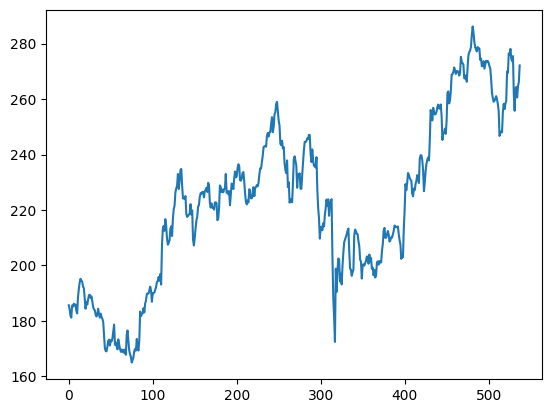

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)


In [ ]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.17031108]
 [0.15884149]
 [0.13953296]
 [0.13350937]
 [0.16965096]
 [0.16618533]
 [0.17484941]
 [0.16989851]
 [0.1726215 ]
 [0.15372555]
 [0.14588662]
 [0.19498308]
 [0.21916   ]
 [0.23838601]
 [0.24903045]
 [0.24341942]
 [0.24069643]
 [0.22625629]
 [0.22056275]
 [0.1901147 ]
 [0.16007921]
 [0.18037792]
 [0.1720439 ]
 [0.18714415]
 [0.20051159]
 [0.20141926]
 [0.19242512]
 [0.19679842]
 [0.18277086]
 [0.16536018]
 [0.15801634]
 [0.1556234 ]
 [0.14283357]
 [0.13664494]
 [0.14291608]
 [0.15983167]
 [0.14456638]
 [0.13334434]
 [0.14547405]
 [0.13548973]
 [0.12996122]
 [0.12096708]
 [0.08334021]
 [0.04224771]
 [0.0339962 ]
 [0.03300602]
 [0.04728113]
 [0.06394917]
 [0.06790989]
 [0.05058173]
 [0.06601205]
 [0.06287647]
 [0.07195313]
 [0.09142669]
 [0.11279809]
 [0.05256209]
 [0.06007096]
 [0.04827131]
 [0.03886459]
 [0.06857001]
 [0.05346976]
 [0.04150507]
 [0.03168578]
 [0.0383695 ]
 [0.03152075]
 [0.0377919 ]
 [0.0284677 ]
 [0.03853453]
 [0.02293919]
 [0.08284512]
 [0.09530489]
 [0.06

In [ ]:
# splitting the data into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1), :1]

In [ ]:
training_size,test_size

(349, 189)

In [ ]:
len(train_data), len(test_data)

(349, 189)

In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)- time_step-1):
    a = dataset[i:(i+time_step), 0]      ###i=0, 0,1,2,3-------99 100
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(248, 100)
(248,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 439ms/step - loss: 0.1352 - val_loss: 0.0061
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - loss: 0.0277 - val_loss: 0.0132
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - loss: 0.0091 - val_loss: 0.0894
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - loss: 0.0190 - val_loss: 0.0621
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - loss: 0.0094 - val_loss: 0.0160
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - loss: 0.0105 - val_loss: 0.0138
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - loss: 0.0092 - val_loss: 0.0361
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - loss: 0.0076 - val_loss: 0.0496
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - loss: 0.0086 - val_loss: 0.0365
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step - loss: 0.0070 - val_loss: 0.0230
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - loss: 0.0077 - val_loss: 0.0254
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - loss: 0.0

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.19.0'

In [ ]:
### prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

223.29111092764998

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

260.70498080338285

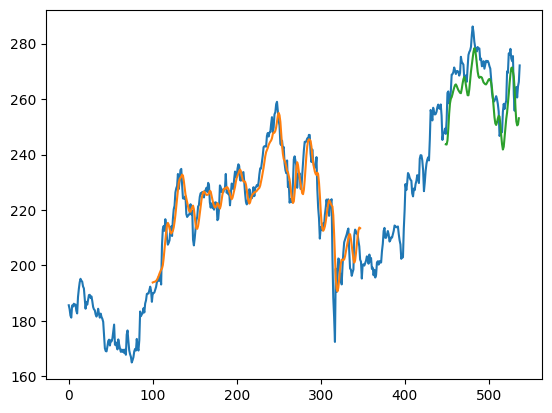

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

189

In [ ]:
x_input=test_data[len(test_data) - n_steps:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.7945164]
31
[0.7945164]
32
[0.7945164]
33
[0.7945164]
34
[0.7945164]
35
[0.7945164]
36
[0.7945164]
37
[0.7945164]
38
[0.7945164]
39
[0.7945164]
40
[0.7945164]
41
[0.7945164]
42
[0.7945164]
43
[0.7945164]
44
[0.7945164]
45
[0.7945164]
46
[0.7945164]
47
[0.7945164]
48
[0.7945164]
49
[0.7945164]
50
[0.7945164]
51
[0.7945164]
52
[0.7945164]
53
[0.7945164]
54
[0.7945164]
55
[0.7945164]
56
[0.7945164]
57
[0.7945164]
58
[0.7945164]
59
[0.7945164]
60
[[0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.794516384601593], [0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

538

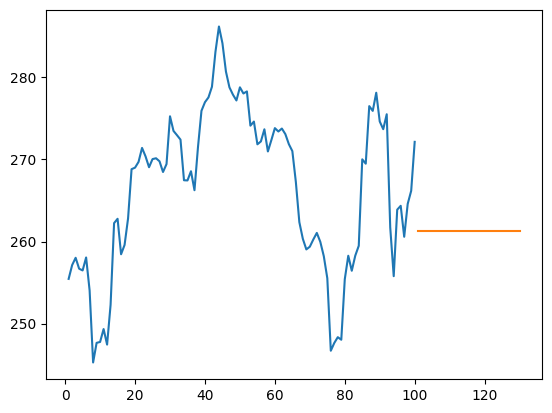

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-n_steps:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

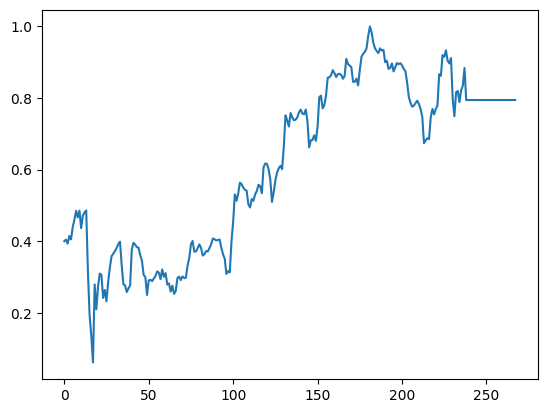

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

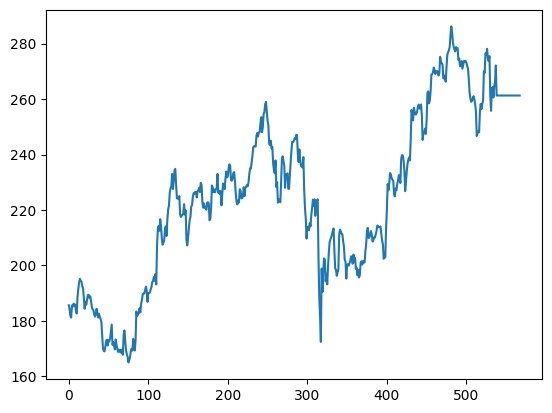

In [ ]:
plt.plot(df3)